<a href="https://colab.research.google.com/github/ali94an/Car-Insurance-Data/blob/main/Car_Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Insurance Data

- Author: Ali Abu Nimah

## Project Overview

#### 1. What is the target?
The target variable is **`OUTCOME`**, which is a binary classification:
- **`1`** = the customer purchased car insurance.
- **`0`** = the customer did not purchase car insurance.

This is a **binary classification task**.

---

#### 2. What does one row represent?
Each row represents **a unique individual customer** who was offered car insurance, along with their personal, vehicle, and behavioral attributes.

---

#### 3. How many features does the data have?
The dataset contains **17 features**, excluding the target `OUTCOME` and `ID`.

Examples of features include:
- AGE, GENDER, DRIVING_EXPERIENCE, EDUCATION, INCOME, CREDIT_SCORE
- VEHICLE_YEAR, VEHICLE_TYPE, ANNUAL_MILEAGE, POSTAL_CODE, PAST_ACCIDENTS

---

#### 4. How many rows are in the dataset?
The dataset contains **10,000 rows**, meaning it includes data on 10,000 individual customers.

---

#### 5. What opportunities exist for dimensionality reduction or feature selection with this dataset?
- **Feature selection**: Techniques like **permutation importance**, or **tree-based feature importance** can help eliminate low-impact or redundant features.
- **Dimensionality reduction**: Not strongly required due to the small number of features, but methods like **PCA** could be considered if encoding categorical variables increases dimensionality.

---

#### 6. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Categorical variables (e.g., GENDER, DRIVING_EXPERIENCE) require proper encoding (e.g., one-hot or ordinal encoding).
- Some features (like CREDIT_SCORE or VEHICLE_TYPE) may have **inconsistent categories** or **missing values**.

## Load and Inspect Data

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

In [3]:
fpath = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ9c9Pc0j3PaMTgXDfGWpty31V_71_fcrAlN8TFMHvgiLN5rW-ZxOE1VMadQ3sdrGiSeTprDMg6QETg/pub?gid=1843732834&single=true&output=csv'
df = pd.read_csv(fpath)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

- We have `19` columns and `10000` rows.
- We have `11` Numericals, and `8` Categoricals features.

In [5]:
df.dtypes

,0
ID,int64
AGE,object
GENDER,object
RACE,object
DRIVING_EXPERIENCE,object
EDUCATION,object
INCOME,object
CREDIT_SCORE,float64
VEHICLE_OWNERSHIP,int64
VEHICLE_YEAR,object


- After inspecting the data and its types, the data types seem fine.

## Clean Data

In [6]:
df.isnull().sum()

,0
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,982
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


- `CREDIT_SCORE` with `982` null values and `ANNUAL_MILEAGE` with `957` null values.
- We'll discuss how we'll deal with them later.

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Filtering and checking duplicates with keep = false
df[df.duplicated(keep=False)]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME


- There are `12` duplicated rows, but after inspecting them, the cases could happen, so we'll ignore them and justify it's normal cases.

In [9]:
# Possibility to put ID column as index
df['ID'].nunique()

10000

- Because it has `10000` unique values as the number of rows we have and 0 null values, then it would be an index.

In [10]:
df.set_index('ID', inplace=True)

In [11]:
string_cols = df.select_dtypes('object').columns
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print("\n")

Value counts for AGE
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64


Value counts for GENDER
GENDER
female    5010
male      4990
Name: count, dtype: int64


Value counts for RACE
RACE
majority    9012
minority     988
Name: count, dtype: int64


Value counts for DRIVING_EXPERIENCE
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64


Value counts for EDUCATION
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64


Value counts for INCOME
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64


Value counts for VEHICLE_YEAR
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64


Value counts for VEHICLE_TYPE
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64




- Consistent categoricals, let's check for encoded categorical features.

In [12]:
enc_cols = ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN']
# Obtain the value counts for all string columns
for col in enc_cols:
  print(f"Value counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print("\n")

Value counts for VEHICLE_OWNERSHIP
VEHICLE_OWNERSHIP
1    6970
0    3030
Name: count, dtype: int64


Value counts for MARRIED
MARRIED
0    5018
1    4982
Name: count, dtype: int64


Value counts for CHILDREN
CHILDREN
1    6888
0    3112
Name: count, dtype: int64




- No cleaning needed, data are fine.

In [13]:
df.describe().round(2)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.00,10000.00,10000.0,10000.00,10000.00,9043.00,10000.00,10000.00,10000.00,10000.00
mean,0.52,0.70,0.5,0.69,19864.55,11697.00,1.48,0.24,1.06,0.31
std,0.14,0.46,0.5,0.46,18915.61,2818.43,2.24,0.55,1.65,0.46
min,0.05,0.00,0.0,0.00,10238.00,2000.00,0.00,0.00,0.00,0.00
25%,0.42,0.00,0.0,0.00,10238.00,10000.00,0.00,0.00,0.00,0.00
50%,0.53,1.00,0.0,1.00,10238.00,12000.00,0.00,0.00,0.00,0.00
75%,0.62,1.00,1.0,1.00,32765.00,14000.00,2.00,0.00,2.00,1.00
max,0.96,1.00,1.0,1.00,92101.00,22000.00,22.00,6.00,15.00,1.00


- Data are fine, no typo, no incosistencies.
- Values in `SPEEDING_VIOLATIONS` and `PAST_ACCIDENTS` could be `OUTLIERS`.
- Null values will be filled by `Mean` for both `CREDIT_SCORE` and `ANNUAL_MILEAGE`, because the data distribution is fine, if there were extreme values we would tend to do it with `median`.
- We'll have a further look in data exploration.

In [14]:
# Objects
df.describe(include='object').T

,count,unique,top,freq
AGE,10000,4,26-39,3063
GENDER,10000,2,female,5010
RACE,10000,2,majority,9012
DRIVING_EXPERIENCE,10000,4,0-9y,3530
EDUCATION,10000,3,high school,4157
INCOME,10000,4,upper class,4336
VEHICLE_YEAR,10000,2,before 2015,6967
VEHICLE_TYPE,10000,2,sedan,9523


- Seems no high cardinality, but we'll look further in data exploration.

## Exploratory Data Analysis

### EDA Exploration Functions

In [15]:
def explore_numeric(df,x,figsize=(6,5)):
  # Making our figure with gridspec for subplots
  gridspec={"height_ratios":[0.7,0.3]}
  fig,axes=plt.subplots(nrows=2,figsize=figsize,sharex=True,gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df,x=x,ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df,x=x,ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count=df[x].isna().sum()
  null_perc = round((null_count/len(df)*100),2)
  nunique = df[x].nunique()
  val_counts = df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = round((freq/len(df)*100),2)
  print(f"- NaN's Found: {null_count} ({null_perc}%)")
  print(f"- Unique Values: {nunique}")
  print(f"- Most Common Value: '{most_common_val}' occurs {freq} times ({perc_most_common}%)")

In [16]:
def explore_categorical(df,x,fillna=True,placeholder='Missing',figsize=(6,4),order=None):
  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc=round((null_count/len(temp_df)*100),2)
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig,ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df,x=x,ax=ax,order=order)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
  ax.set_title(f'Column: {x}')
  fig.tight_layout()
  plt.show();
  nunique = temp_df[x].nunique()
  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = round((freq/len(temp_df)*100),2)
  print(f"- NaN's Found: {null_count} ({null_perc}%)")
  print(f"- Unique Values: {nunique}")
  print(f"- Most Common Value: '{most_common_val}' occurs {freq} times ({perc_most_common}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is constant or quari-constant feature and should be dropped.")
  else: print("- Not Constant or quasi-constant.")
  return fig,ax

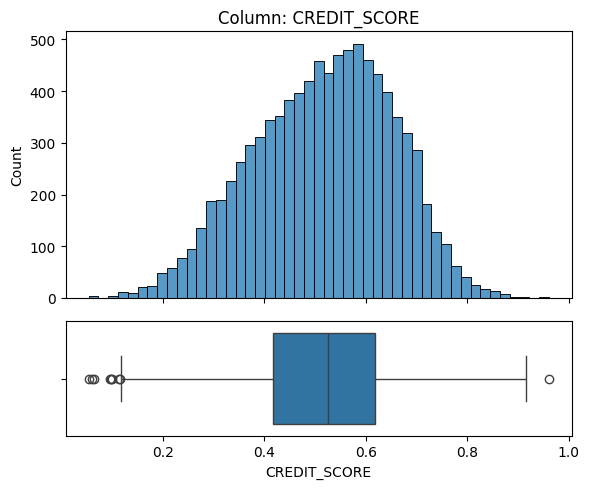

- NaN's Found: 982 (9.82%)
- Unique Values: 9018
- Most Common Value: 'nan' occurs 982 times (9.82%)


In [17]:
explore_numeric(df,'CREDIT_SCORE');

- The data is ranged between `0.4` and `0.6`.
- `Outliers` appear in here as there are values below `0.2` and values exceeds `0.8`

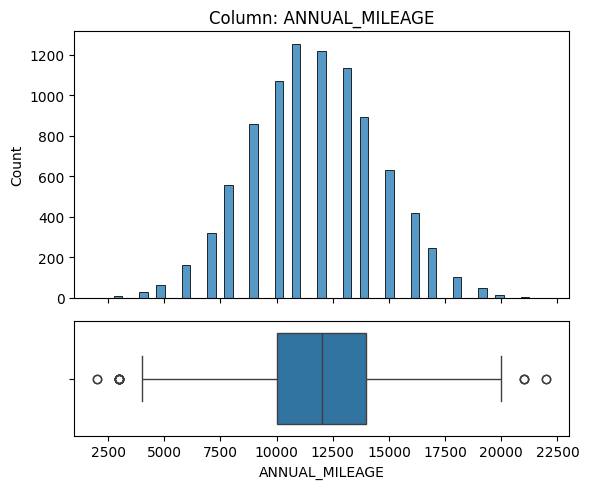

- NaN's Found: 957 (9.57%)
- Unique Values: 21
- Most Common Value: '11000.0' occurs 1253 times (12.53%)


In [18]:
explore_numeric(df,'ANNUAL_MILEAGE');

- The data is ranged between `10000` and `13500`.
- `Outliers` appear in here as there are values below `0.2` and values exceeds `0.8`

**Null Values Strategy:**
- Null values will be filled by `Median` for both `CREDIT_SCORE` and `ANNUAL_MILEAGE`, because the data distribution includes `Outliers`, because outliers effect `Mean` of the data, while `Median` would remain the data distribution.

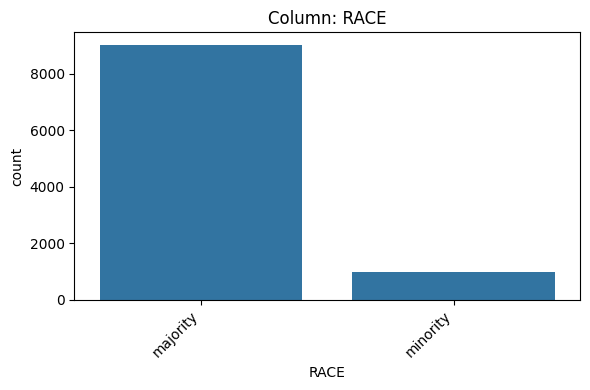

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most Common Value: 'majority' occurs 9012 times (90.12%)
- Not Constant or quasi-constant.


In [19]:
explore_categorical(df,'RACE');

- We had to make sure that this feature isn't constant or quasi-constant, as it had major difference when we inspected it using `value_counts`, but as it shows, it is only `90%` for `majority` value, which means it is not constant or quasi-constant.

## Preprocesing and Modeling

In [20]:
y = df['OUTCOME']
X = df.drop(columns='OUTCOME')
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [21]:
# checking for class balance
df['OUTCOME'].value_counts(normalize=True,dropna=False)

,proportion
OUTCOME,
0,0.6867
1,0.3133


- Our `target` is imbalanced.

### Evaluation Metrics Function

In [2]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict

In [22]:
from sklearn.pipeline import make_pipeline
# Numerical Prepprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").drop(columns=enc_cols).columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns: Index(['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
        'DUIS', 'PAST_ACCIDENTS'],
       dtype='object'))

In [23]:
ord_cols = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']
print("Ordinal Columns:", ord_cols)
age_order = ['16-25', '26-39', '40-64', '65+']
exp_order = ['0-9y', '10-19y', '20-29y', '30y+']
edu_order = ['none', 'high school', 'university']
income_order = ['poverty', 'working class', 'middle class', 'upper class']
vehicle_year_order = ['before 2015', 'after 2015']
order = [
    age_order,
    exp_order,
    edu_order,
    income_order,
    vehicle_year_order]
ord_encoder = OrdinalEncoder(categories=order)
scaler_ord = StandardScaler()
ord_pipe = make_pipeline(ord_encoder, scaler_ord)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

Ordinal Columns: ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']


('ordinal',
 Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['16-25', '26-39', '40-64', '65+'],
                                             ['0-9y', '10-19y', '20-29y',
                                              '30y+'],
                                             ['none', 'high school',
                                              'university'],
                                             ['poverty', 'working class',
                                              'middle class', 'upper class'],
                                             ['before 2015', 'after 2015']])),
                 ('standardscaler', StandardScaler())]),
 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR'])

In [24]:
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

OneHotEncoder Columns: Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object')


('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))

In [25]:
from sklearn.compose import ColumnTransformer
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['16-25',
                                                                              '26-...
                                                                              'upper '
                                                                              'class'],
                                                                             ['before '
                                                                              '2015',
                                                                              'after '
                                                                              '2015']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME', 'VEHICLE_YEAR']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                  verbose_feature_names_out=False)

### Random Forest Classifier Base Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc_pipe = make_pipeline(preprocessor, rfc)
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   Ord...
                                                                   StandardScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5144
           1       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



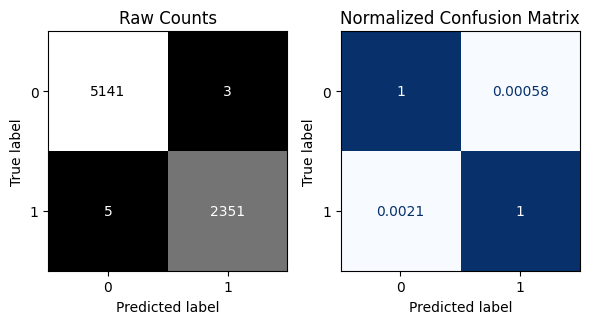


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1723
           1       0.74      0.64      0.69       777

    accuracy                           0.82      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.81      0.82      0.82      2500



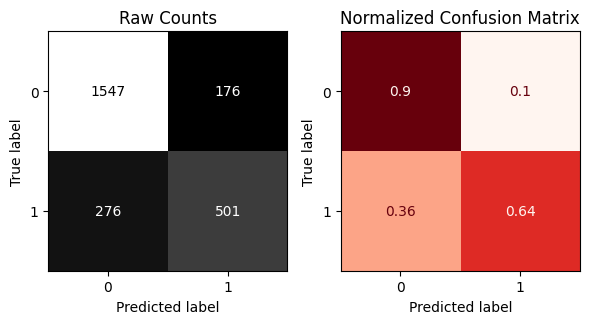

In [27]:
evaluate_classification(rfc_pipe, X_train, y_train, X_test, y_test)

### Feature Importance

In [28]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rfc_pipe, X_test, y_test,n_repeats =5, random_state = 42)
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

,permutation importance
DRIVING_EXPERIENCE,0.05936
VEHICLE_YEAR,0.04896
POSTAL_CODE,0.02536
GENDER,0.01696
INCOME,0.01272
AGE,0.01072
ANNUAL_MILEAGE,0.00952
CREDIT_SCORE,0.00856
PAST_ACCIDENTS,0.00608
EDUCATION,0.00240


In [29]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

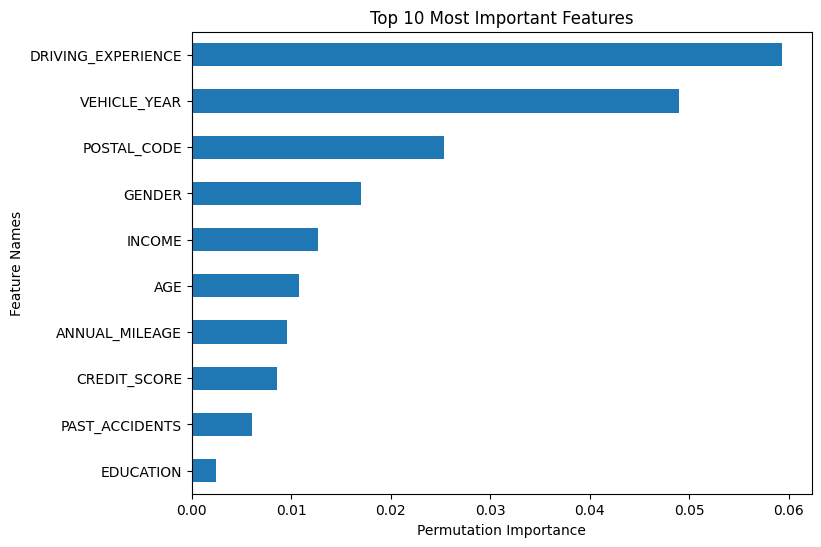

In [30]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

- These features make sense because they help us understand how risky or reliable a driver might be — for example, someone with more driving experience and a newer vehicle is more likely to be a good customer, while past accidents or low credit scores might signal higher risk.

**Top 2 Features:**
- **DRIVING_EXPERIENCE** and **VEHICLE_YEAR** appear to be the top 2 important features.
- **DRIVING_EXPERIENCE** : `5.9%` importance.
- **VEHICLE_YEAR** : `4.8%` importance.

## Exploraing Top 2 Features with Target
### Feature vs. Target Function

In [31]:
# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='class'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

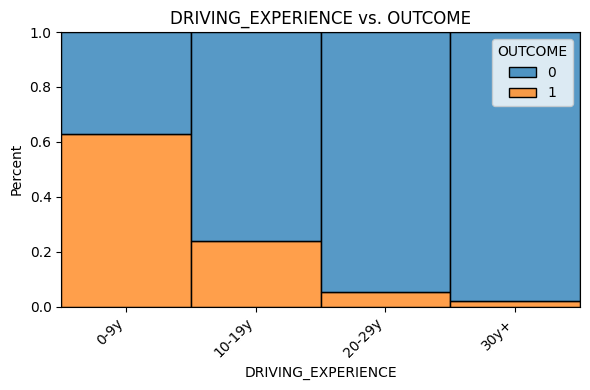

In [32]:
plot_categorical_vs_target(df, 'DRIVING_EXPERIENCE', 'OUTCOME',order = exp_order);

- Customers with less driving experience (0-9 years) are significantly more likely to purchase car insurance than those with more experience. As driving experience increases, the likelihood of purchase drops sharply.

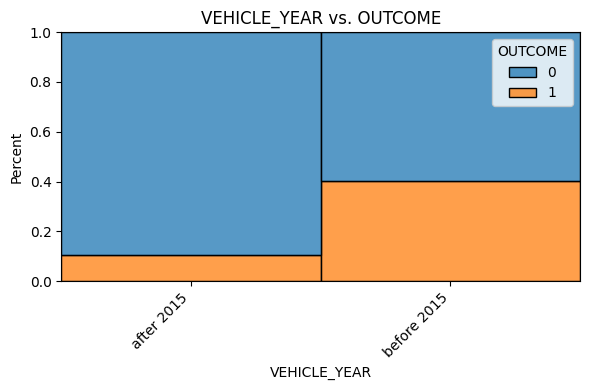

In [33]:
plot_categorical_vs_target(df, 'VEHICLE_YEAR', 'OUTCOME');

- Customers with older vehicles (before 2015) are more likely to purchase car insurance compared to those with newer cars.

### PCA

In [43]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [44]:
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

In [45]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5144
           1       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



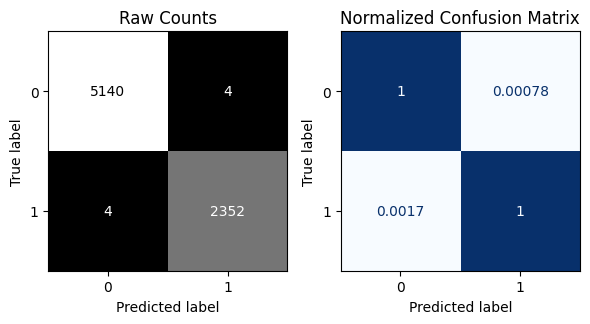


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1723
           1       0.67      0.61      0.64       777

    accuracy                           0.79      2500
   macro avg       0.75      0.74      0.74      2500
weighted avg       0.78      0.79      0.78      2500



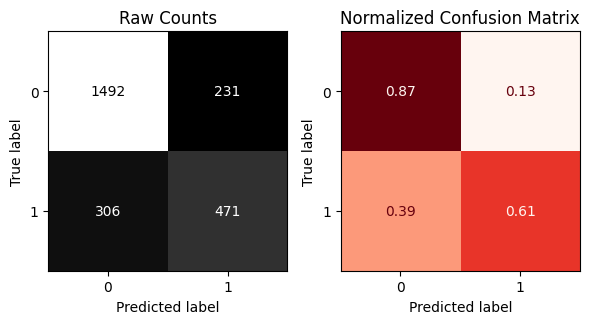

In [46]:
evaluate_classification(rfc, X_train_pca, y_train, X_test_pca, y_test)

### KMEANS

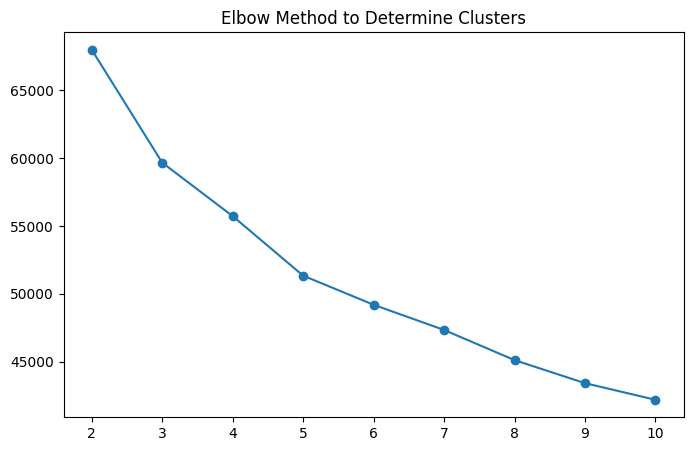

In [47]:
from sklearn.cluster import KMeans
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_train_processed)
  inertias.append(kmeans.inertia_)
#plot inertias for each number of clusters.
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ks, inertias,marker='o')
ax.set_title('Elbow Method to Determine Clusters')
ax.set_xticks(ks);

In [50]:
kmeans = KMeans(n_clusters=3, n_init = 'auto', random_state=42)
X_train_cluster_labels = kmeans.fit_predict(X_train_processed)
X_test_cluster_labels = kmeans.predict(X_test_processed)

In [53]:
# Convert cluster labels to DataFrames
X_train_clusters_df = pd.DataFrame(X_train_cluster_labels, columns=['Cluster'], index=X_train.index)
X_test_clusters_df = pd.DataFrame(X_test_cluster_labels, columns=['Cluster'], index=X_test.index)
# Concatenate all DataFrames
X_train_final = pd.concat([X_train_processed, X_train_clusters_df], axis=1)
X_test_final = pd.concat([X_test_processed, X_test_clusters_df], axis=1)
X_train_final.head()

,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car,Cluster
ID,,,,,,,,,,,,,,,,,,
597605,1.367938,3.867776,0.098334,-0.659296,-0.432581,-0.643278,0.494466,-1.077028,-0.278819,0.956921,-0.652161,0.0,1.0,1.0,0.0,1.0,0.0,2
208394,-1.702804,0.694321,0.098334,-0.659296,-0.432581,-0.643278,-1.451230,-1.077028,-1.631436,-1.661114,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0,0
318837,0.063118,-0.510486,0.098334,-0.659296,-0.432581,1.147363,0.494466,-0.072712,1.073798,0.956921,-0.652161,0.0,1.0,1.0,0.0,1.0,0.0,2
559214,-0.477776,-0.510486,3.099366,0.229004,-0.432581,-0.643278,-0.478382,-0.072712,1.073798,-0.788436,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0,0
555274,-2.802891,-0.510486,-0.651924,-0.659296,-0.432581,-0.643278,-1.451230,-1.077028,-1.631436,-1.661114,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0,0


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5144
           1       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



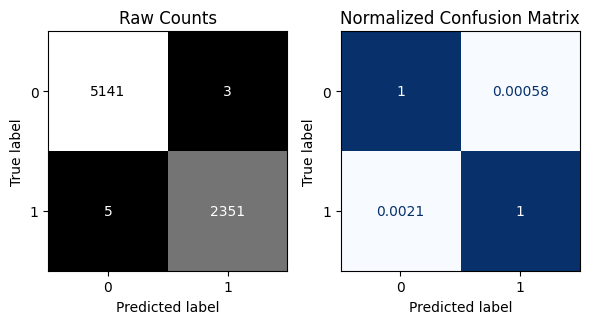


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1723
           1       0.74      0.64      0.69       777

    accuracy                           0.82      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.81      0.82      0.81      2500



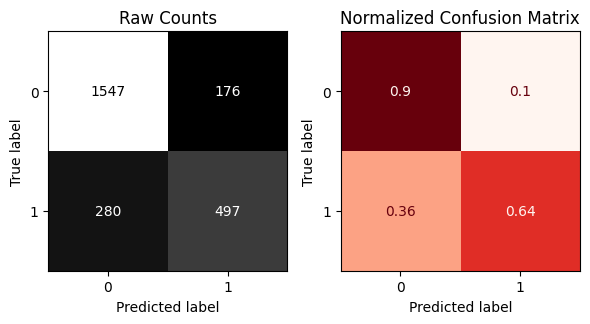

In [54]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_final, y_train)
evaluate_classification(rfc, X_train_final, y_train, X_test_final, y_test)

### Feature Selection - Wrapper Method Forward Selection

In [55]:
from sklearn.feature_selection import SequentialFeatureSelector
rfc = RandomForestClassifier(random_state=42)
# Instantiate the SequentialFeatureSelector
sk_sfs = SequentialFeatureSelector(rfc, n_features_to_select=10,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sk_sfs.fit(X_train_final, y_train)

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=10, n_jobs=-1)

In [62]:
features_to_keep = sk_sfs.support_
# Only include the features selected
X_train_10 = X_train_final.loc[:,features_to_keep]
X_test_10 = X_test_final.loc[:,features_to_keep]

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5144
           1       0.75      0.73      0.74      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.81      0.81      7500
weighted avg       0.84      0.84      0.84      7500



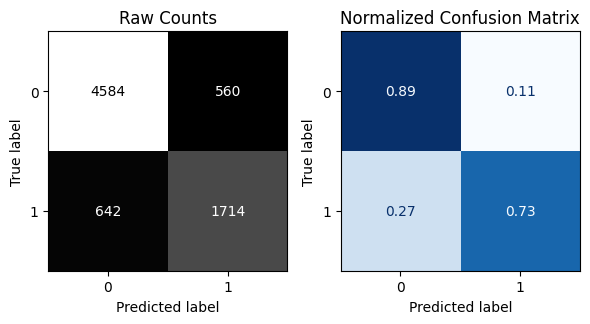


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1723
           1       0.74      0.69      0.72       777

    accuracy                           0.83      2500
   macro avg       0.80      0.79      0.80      2500
weighted avg       0.83      0.83      0.83      2500



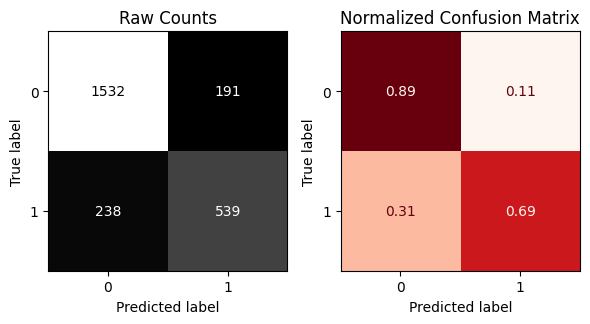

In [63]:
# Instantiate default random forest
rfc_final = RandomForestClassifier(random_state=42)
# Fit on 50 selected featuers
rfc_final.fit(X_train_10, y_train)
# Evaluate with custom function
evaluate_classification(rfc_final, X_train_10, y_train, X_test_10, y_test)